In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'sam-resources/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Date,Name,State,MedianSalePrice,Year,MedianListPrice,SalesTotal,Total Population,Total Labor Force,Unemployed Labor Force,Median Income,MORTGAGE30US,Unemployment Rate
0,0,2008-02-29,United States,NaN,174000.0,2008.0,NaN,205206.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2008-02-29,New York,NY,400000.0,2008.0,NaN,8591.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2008-02-29,Los Angeles,CA,470000.0,2008.0,NaN,4159.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2008-02-29,Chicago,IL,224000.0,2008.0,NaN,5933.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2008-02-29,Dallas,TX,138000.0,2008.0,NaN,5058.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfn = pd.read_csv('sam-resources/dfn.csv')
dfn.head()

,Date,CityName,StateName,MedianSalePrice,Year,SalesTotal,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2009-04-30,New York,NY,339000.0,2009,6974.0,NaN,50173.0,4.78,NaN,73.630547
1,2009-04-30,Los Angeles,CA,320000.0,2009,8168.0,NaN,48570.0,4.78,NaN,75.510228
2,2009-04-30,Chicago,IL,192000.0,2009,5582.0,NaN,46781.0,4.78,NaN,121.214878
3,2009-04-30,Dallas,TX,140000.0,2009,4811.0,NaN,41266.0,4.78,NaN,146.639845
4,2009-04-30,Houston,TX,145000.0,2009,3841.0,NaN,42797.0,4.78,NaN,146.836147


In [22]:
# Finding the 5 largest cities by population
# We will use the latest available year for each city to determine its population size.
latest_year = data['Year'].max()
largest_cities = data[data['Year'] == latest_year].nlargest(9, 'Total Population')['CityName'].unique()


# Extracting data for the 5 largest cities
largest_cities_data = data[data['CityName'].isin(largest_cities)]

# Creating a line plot of the HAI over time for these cities
plt.figure(figsize=(10, 6))
for city in largest_cities:
    city_data = largest_cities_data[largest_cities_data['CityName'] == city]
    plt.plot(city_data['Date'], city_data['HAI'], label=city)

# Add a horizontal line at HAI = 100 to indicate the threshold for affordability
plt.axhline(y=100, color='black', linestyle='--')

plt.title('Housing Affordability Index (HAI) Over Time for the 5 Largest Cities')
plt.xlabel('Year')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Returning the names of the 5 largest cities
largest_cities


KeyError: 'CityName'

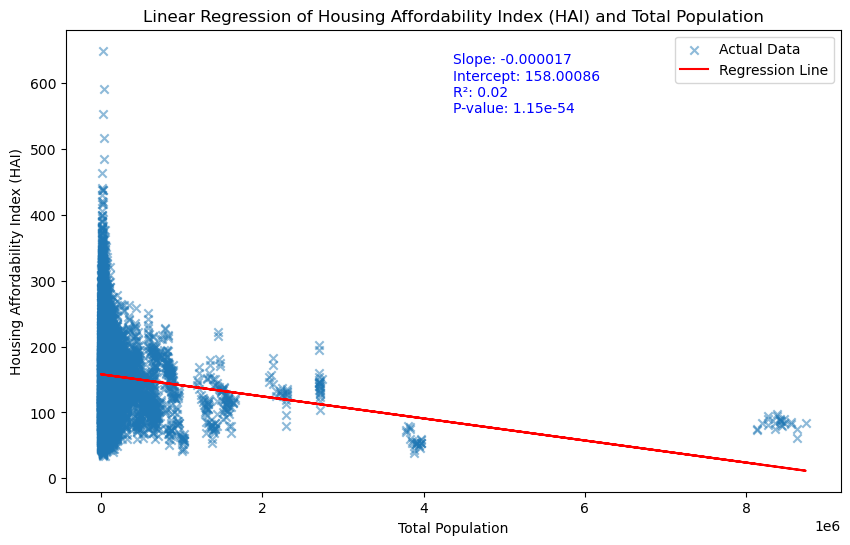

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has the columns 'Total Population' and 'HAI'

# Calculating the linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Total Population'], data['HAI'])

# Generating y values for the regression line
line = slope * data['Total Population'] + intercept

# Plotting the linear regression
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Population'], data['HAI'], alpha=0.5, label='Actual Data', marker='x')
plt.plot(data['Total Population'], line, color='red', label='Regression Line')

# Displaying regression data on the plot
plt.text(0.5, 0.95, f'Slope: {slope:.6f}\nIntercept: {intercept:.5f}\nR²: {r_value**2:.2f}\nP-value: {p_value:.2e}', 
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, color='blue')

plt.title('Linear Regression of Housing Affordability Index (HAI) and Total Population')
plt.xlabel('Total Population')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.show()


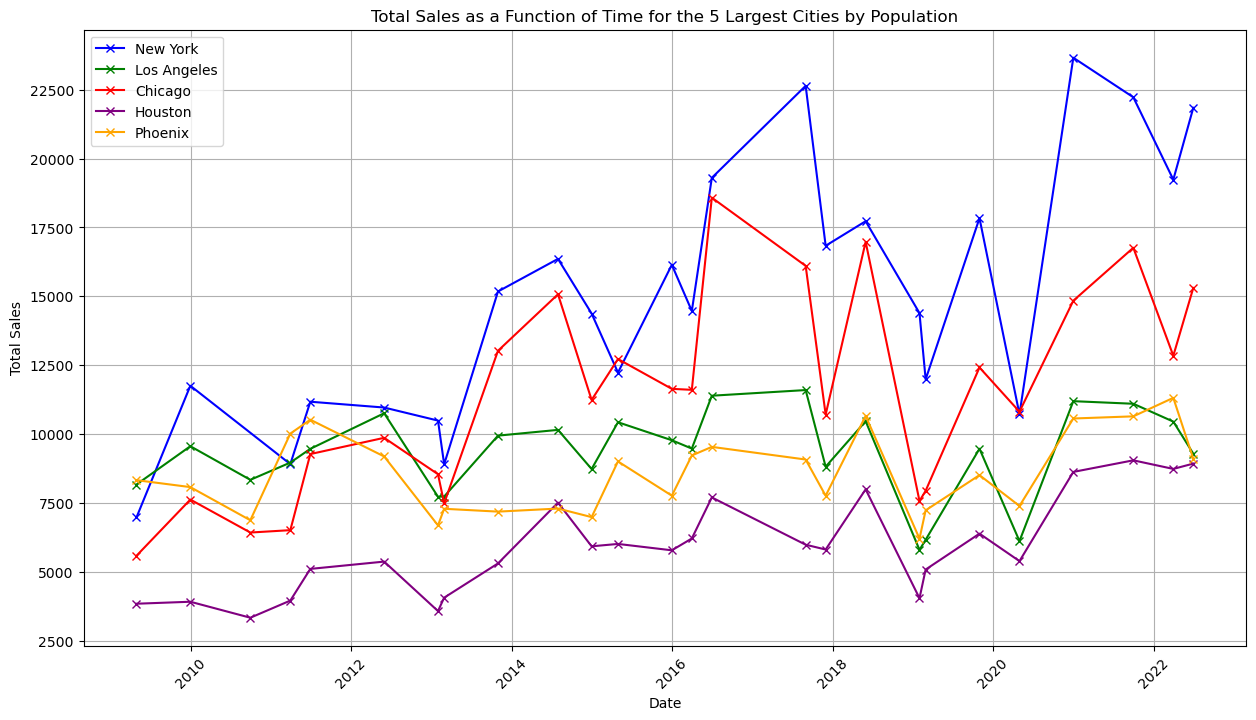

In [ ]:

# Assuming 'dfn' is your DataFrame
# Convert 'Date' to datetime format
dfn['Date'] = pd.to_datetime(dfn['Date'])

# Identifying the 5 largest cities by population
largest_cities_5 = dfn.groupby('CityName')['Total Population'].max().sort_values(ascending=False).head(5).index

# Filtering the data for these 5 cities
largest_cities_data_5 = dfn[dfn['CityName'].isin(largest_cities_5)]

# Grouping by Date and City for total sales, then resetting the index
sales_over_time_cities_5 = largest_cities_data_5.groupby(['Date', 'CityName'])['SalesTotal'].sum().reset_index()

# Sorting the data by CityName and then by Date
sales_over_time_cities_5 = sales_over_time_cities_5.sort_values(by=['CityName', 'Date'])

# Colors for 5 cities
colors_5 = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting
plt.figure(figsize=(15, 8))
for i, city in enumerate(largest_cities_5):
    city_data = sales_over_time_cities_5[sales_over_time_cities_5['CityName'] == city]
    plt.plot(city_data['Date'], city_data['SalesTotal'], label=city, color=colors_5[i], marker='x')

plt.title('Total Sales as a Function of Time for the 5 Largest Cities by Population')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# flip the

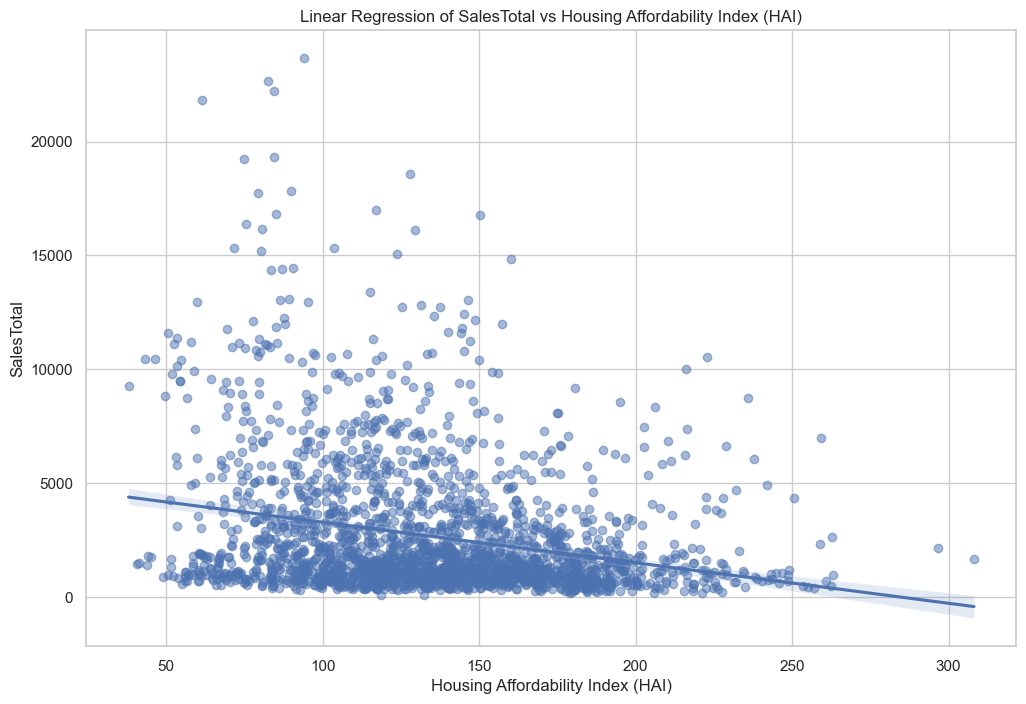

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for linear regression
x = dfn['HAI']
y = dfn['SalesTotal']  # Housing Affordability Index

# Creating the plot with a linear regression line
plt.figure(figsize=(12, 8))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5})
plt.title('Linear Regression of SalesTotal vs Housing Affordability Index (HAI)')
plt.xlabel('Housing Affordability Index (HAI)')
plt.ylabel('SalesTotal')
plt.grid(True)
plt.show()


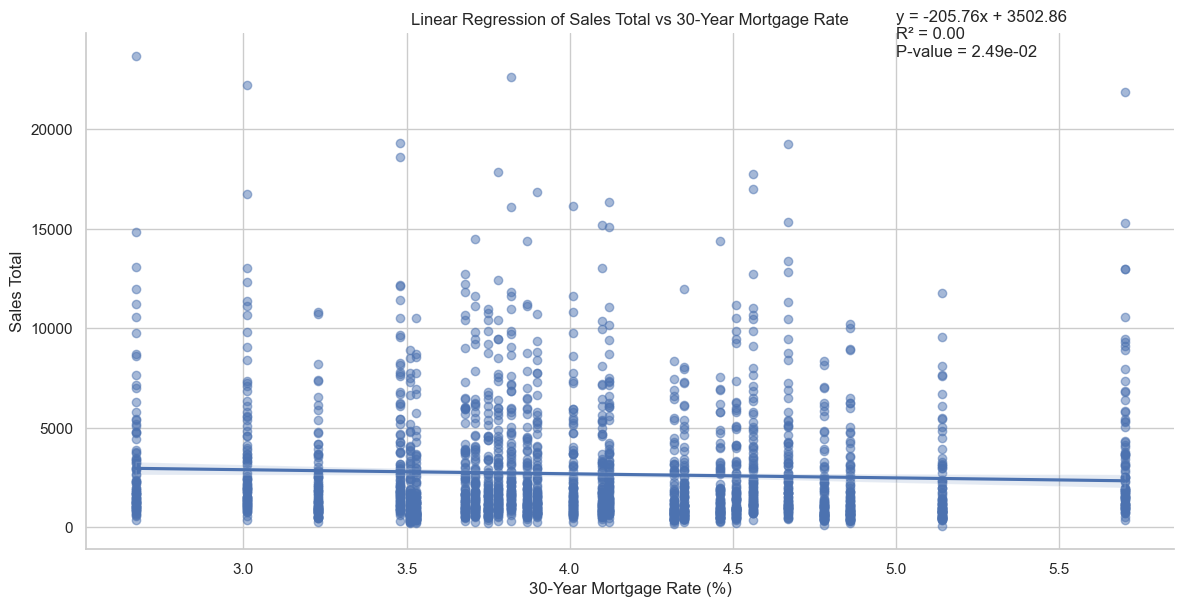

In [ ]:
# Filter out rows with missing values in 'SalesTotal' or 'MORTGAGE30US' (30-year mortgage rate)
df_filtered_interest_rate = dfn.dropna(subset=['SalesTotal', 'MORTGAGE30US'])

# Linear regression using Seaborn
plot_interest_rate = sns.lmplot(x='MORTGAGE30US', y='SalesTotal', data=df_filtered_interest_rate, aspect=2, height=6, scatter_kws={'alpha':0.5})

# Extracting regression line data for interest rate
slope_interest_rate, intercept_interest_rate, r_value_interest_rate, p_value_interest_rate, std_err_interest_rate = stats.linregress(df_filtered_interest_rate['MORTGAGE30US'], df_filtered_interest_rate['SalesTotal'])

# Annotate with regression info
plt.title('Linear Regression of Sales Total vs 30-Year Mortgage Rate')
plt.xlabel('30-Year Mortgage Rate (%)')
plt.ylabel('Sales Total')
plt.text(5, max(df_filtered_interest_rate['SalesTotal']), f'y = {slope_interest_rate:.2f}x + {intercept_interest_rate:.2f}\nR² = {r_value_interest_rate**2:.2f}\nP-value = {p_value_interest_rate:.2e}')

# Show plot
plt.show()


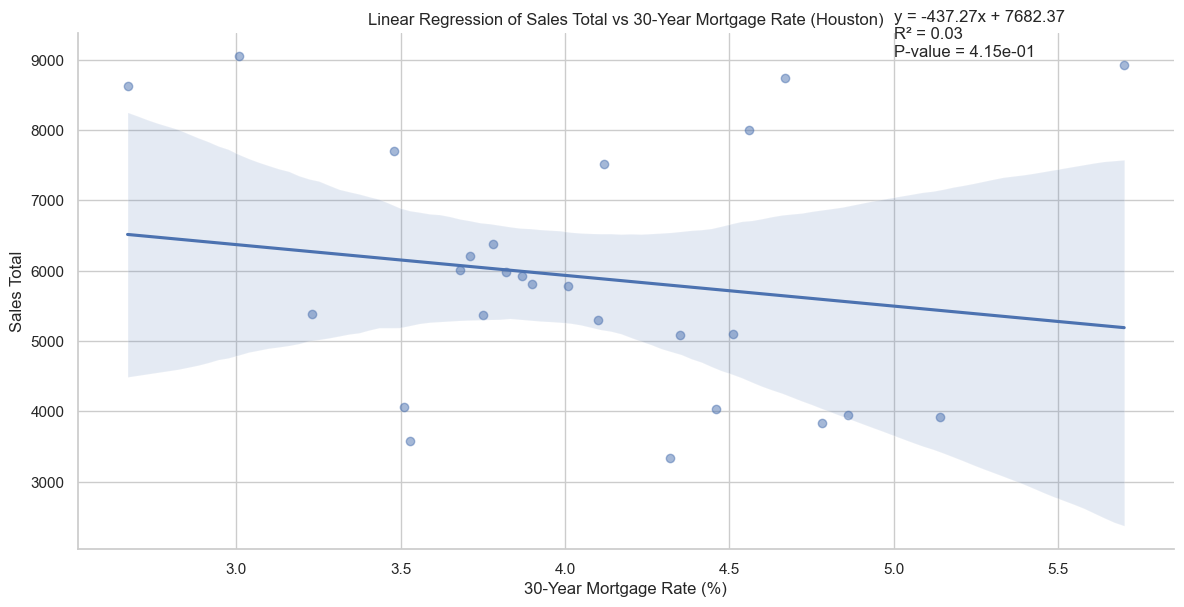

In [ ]:
# Filter data for Houston and for non-missing values in 'SalesTotal' and 'MORTGAGE30US'
df_houston = dfn[(dfn['CityName'] == 'Houston') & dfn['SalesTotal'].notna() & dfn['MORTGAGE30US'].notna()]

# Linear regression using Seaborn for Houston data
plot_houston = sns.lmplot(x='MORTGAGE30US', y='SalesTotal', data=df_houston, aspect=2, height=6, scatter_kws={'alpha':0.5})

# Extracting regression line data for Mortgage Rate in Houston
slope_houston, intercept_houston, r_value_houston, p_value_houston, std_err_houston = stats.linregress(df_houston['MORTGAGE30US'], df_houston['SalesTotal'])

# Annotate with regression info for Houston
plt.title('Linear Regression of Sales Total vs 30-Year Mortgage Rate (Houston)')
plt.xlabel('30-Year Mortgage Rate (%)')
plt.ylabel('Sales Total')
plt.text(5, max(df_houston['SalesTotal']), f'y = {slope_houston:.2f}x + {intercept_houston:.2f}\nR² = {r_value_houston**2:.2f}\nP-value = {p_value_houston:.2e}')

# Show plot
plt.show()


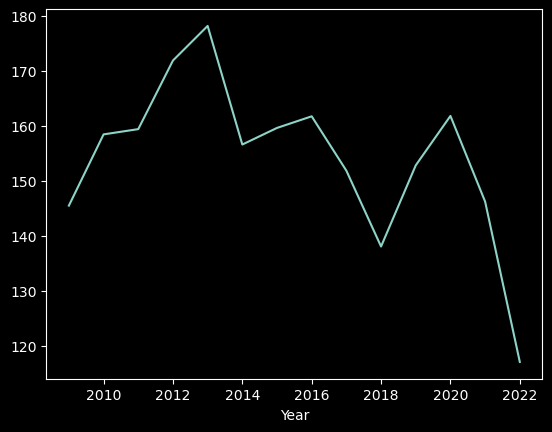

In [ ]:
# Line plot of the average housing affordability index by year
df.groupby('Year')['HAI'].mean().plot()
plt.show()


In [ ]:
# Load new data
df2 = pd.read_csv('sam-resources/census_data_2009-2022ksada.csv')

df2.head()

,City,Total Population,Total Labor Force,Unemployed Labor Force,Median Income,Year
0,"Pine Flat CDP, CA",114,22.0,4.0,15724.0,2011
1,"Pine Grove CDP, CA",2573,1098.0,64.0,52917.0,2011
2,"Pine Mountain Lake CDP, CA",2695,942.0,100.0,54200.0,2011
3,"Piñon Hills CDP, CA",6130,2510.0,503.0,38140.0,2011
4,"Pioneer CDP, CA",1226,621.0,109.0,42917.0,2011
